Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Teo Kai Wen"
COLLABORATORS = ""

---

# Assignment 6

This assignment gives you practice with regular expressions.

First you should import the `re` module, and also some other things for testing:

In [1]:
import re
import nltk
from nltk.corpus import gutenberg, names
import matplotlib as plt

## Understanding Patterns (2 points)

Give a one sentence (or one phrase) description of the following patterns and an example that would match. For instance, for the pattern `[aeiou]\d+` might be described as "one vowel followed by one or more digits" with an example "a12"; `\w+ing` might be described as "a word ending in 'ing'" with an example "studying".

1. `[+-]?\d+`
2. `(un|non|anti|contra|counter|dis|de|mis)\w+`

1. Zero or one instance of "+" or "-" followed by one or more digit characters (e.g. +32)
2. An instance of "un" or "non" or "anti".... or "mis" followed by one or more word characters (e.g. misnomer)

## Matching (6 points)

For each of the following, create a regular expression that passes its tests. Store the regular expression pattern string in a variable called `pattern` (to make it easier to test). For example, if you are to create a pattern for positive or negative integers, you might do this:

```python
pattern = r'-?\d+'
```

... which is then tested like this:

```python
assert re.findall(pattern, '5 -11 abc') == ['5', '-11']
```

### Words that are 16 or more letters (1 point)

Match complete words that have length 16 or greater. For instance, "navigation" (10 letters) is not matched, but "circumnavigation" (16 letters) is.

In [7]:
pattern = r'\w{16,}'  # FILL IN THE PATTERN

In [8]:
assert not re.match(pattern, 'navigation')
assert re.match(pattern, 'circumnavigation')

longwords = re.findall(pattern, gutenberg.raw('melville-moby_dick.txt'))
assert all(len(w) >= 16 for w in longwords)
assert len(longwords) == 36  # there should be this many in Moby Dick
print('All tests passed!')
print(longwords)

All tests passed!
['CIRCUMNAVIGATION', 'uncomfortableness', 'cannibalistically', 'circumnavigations', 'superstitiousness', 'apprehensiveness', 'indiscriminately', 'indiscriminately', 'superstitiousness', 'comprehensiveness', 'circumnavigating', 'preternaturalness', 'circumnavigation', 'apprehensiveness', 'indiscriminately', 'simultaneousness', 'indispensableness', 'apprehensiveness', 'undiscriminating', 'irresistibleness', 'Physiognomically', 'physiognomically', 'physiognomically', 'circumnavigation', 'hermaphroditical', 'circumnavigating', 'characteristically', 'comprehensiveness', 'comprehensiveness', 'uncompromisedness', 'uninterpenetratingly', 'responsibilities', 'supernaturalness', 'subterraneousness', 'apprehensiveness', 'simultaneousness']


### NRIC numbers (1 points)

The format for Singapore's NRIC numbers is the following ([source](https://en.wikipedia.org/wiki/National_Registration_Identity_Card#Structure_of_the_NRIC_number.2FFIN)):

    #0123456@
    
Where:

* `#` is one of 'S', 'T', 'F', or 'G'
* `0123456` is a sequence of 7 digits
* `@` is an uppercase letter ('A' through 'Z')

**NOTE:** the pattern must fully match the string; there should be no extra characters before or after (see the tests).

In [11]:
pattern = r'^[STFG]\d{7}[A-Z]$'  # FILL IN THE PATTERN

In [12]:
assert re.search(pattern, 'S0000001I')
assert re.search(pattern, 'S0000003E')
assert re.search(pattern, 'G0123456Q')
assert not re.search(pattern, 'S012345Z')       # too few digits
assert not re.search(pattern, '  S0123456Z  ')  # extra characters
assert not re.search(pattern, 'A0123456B')      # invalid prefix
assert not re.search(pattern, 's0123456B')      # lowercase prefix
assert not re.search(pattern, 'S0123456b')      # lowercase suffix
assert not re.search(pattern, 'F0123456DEFG')   # too many suffixes
assert not re.search(pattern, 'F0123')          # incomplete
print('All tests passed!')

All tests passed!


### CVCVC patterns (2 points)

Match words (in our case, names) that follow a CVCVC pattern, where C is a consonant cluster (one or more consonants) and V is a vowel cluster (including 'a', 'e', 'i', 'o', and 'u' (and 'y' if you want)). For convenience, you may choose to define a consonant as "not a vowel".

**HINT:** You probably want to use character classes `[...]`/`[^...]` for is-a-vowel and is-not-a-vowel.

**NOTE:** The first letter is probably upper case, so A, E, I, O, and U would match not-a-vowel if you only define vowels as lower-case. You may assume letters after the first one are all lower-case.

In [307]:
pattern = r'^[^AEIOUaeiou]+[aeiou]+[^aeiou]+[aeiou]+[^aeiou]+$'  # FILL IN THE PATTERN

In [308]:
assert re.search(pattern, 'Peter')
assert not re.search(pattern, 'Pete')
assert not re.search(pattern, 'Benjamin')
assert re.search(pattern, 'Christal')
assert not re.search(pattern, 'Christle')
assert re.search(pattern, 'Samuel')
assert not re.search(pattern, 'Shalini')
print('All tests passed!')

male_names = names.words('male.txt')
female_names = names.words('female.txt')
male_cvcvc = len([name for name in male_names if re.search(pattern, name)])
female_cvcvc = len([name for name in female_names if re.search(pattern, name)])
print('{}/{} ({:.2%}) male names'.format(male_cvcvc, len(male_names), male_cvcvc/len(male_names)))
print('{}/{} ({:.2%}) female names'.format(female_cvcvc, len(female_names), female_cvcvc/len(female_names)))

All tests passed!
1068/2943 (36.29%) male names
557/5001 (11.14%) female names


### Words following "have" or "had" and end in "en" (2 points)

For example, in "They had given Thad eleven books.", the pattern matches "given" but not "eleven".

For this you will need to use both capturing groups `(...)` and non-capturing groups `(?:...)`. Note how `re.findall()` keeps only the matches inside capturing groups if they are used:

```python
>>> re.findall(r'[a-z]\d', 'a1 b2 c3')        # without groups
['a1', 'b2', 'c3']
>>> re.findall(r'([a-z])(\d)', 'a1 b2 c3')    # with multiple capturing groups
[('a', '1'), ('b', '2'), ('c', '3')]
>>> re.findall(r'(?:[a-z])(\d)', 'a1 b2 c3')  # with one non-capturing and one capturing group
['1', '2', '3']
```

**HINT:** Recall the `\b` pattern which matches word boundaries.

In [380]:
pattern = r'\b(?:have\s|had\s)(\w*en\b)' # FILL IN THE PATTERN

All tests passed!
Number of matches: 874 (should be almost 800)


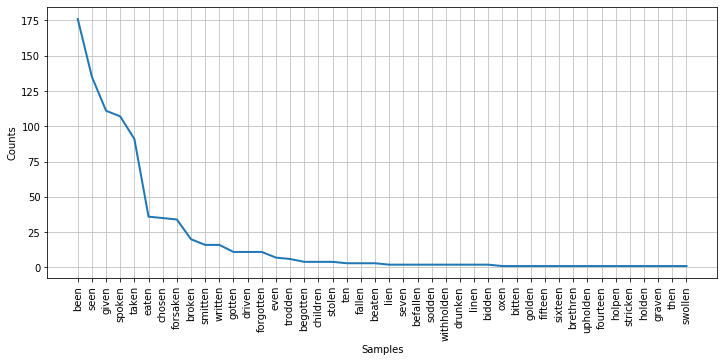

In [379]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5]  # just for the plot; not a test

assert re.findall(pattern, 'They had given Thad eleven books.') == ['given']
assert re.findall(pattern, 'You have written a good regular expression.') == ['written']

irreg_participles = re.findall(pattern, gutenberg.raw('bible-kjv.txt'))
assert all(w.endswith('en') for w in irreg_participles)

print('All tests passed!')

print('Number of matches:', len(irreg_participles), '(should be almost 800)')
nltk.FreqDist(irreg_participles).plot()

## Substitutions

As above, assign the regular expression string to `pattern`, but now also assign the replacement string to `replace` in order to do substitutions. For example, to replace [keyboard with leopard](https://xkcd.com/1031/), do this:

```python
pattern = 'keyboard'
replace = 'leopard'
```

Which is then tested like this:

```python
assert re.sub(pattern, replace, 'Problem exists between keyboard and chair.') == 'Problem exists between leopard and chair.'
```

### Replace 'og' at the end of a word with 'ogue' (1 point)

This is a ~~meager~~ meagre attempt to convert some American spellings to British. For example, to convert "catalog" to "catalogue". The `\b` (word boundary) pattern may be useful.

In [386]:
pattern = r'g\b'  # FILL IN THE PATTERN
replace = r'gue'  # FILL IN THE REPLACEMENT

In [387]:
assert re.sub(pattern, replace, 'ogre monolog') == 'ogre monologue'
assert re.sub(pattern, replace, 'toggle analog') == 'toggle analogue'
assert re.sub(pattern, replace, 'doggy dog') == 'doggy dogue'  # <-- oh well, it's not perfect
print('All tests passed!')

All tests passed!


### Creating TLAs (three-letter acronyms)

Use capturing groups `(...)` and backreferences `\1`, `\2`, etc. to pick out the first letter of three successive words such that the first letter of each is uppercase. For example: "I study at Nanyang Technological University" becomes "I study at NTU".

In [557]:
pattern = r'([A-Z])[a-z]+\s([A-Z])[a-z]+\s([A-Z])[a-z]+'  # FILL IN THE PATTERN
re.findall(pattern, 'I study at Nanyang Technological University.')
replace = r'\1\2\3'  # FILL IN THE REPLACEMENT
re.sub(pattern, replace, 'I study at Nanyang Technological University.')

'I study at NTU.'

In [558]:
assert re.sub(pattern, replace, 'I study at Nanyang Technological University.') == 'I study at NTU.'
assert re.sub(pattern, replace, 'Take the Pan Island Expressway to Changi Business Park.') == 'Take the PIE to CBP.'
assert re.sub(pattern, replace, "Let's go to Din Tai Fung to eat Xiao Long Bao.") == "Let's go to DTF to eat XLB."
print('All tests passed!')

All tests passed!
